# Restaurant Food Cost Project(Regression)

# Data Preprocessing

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
train=pd.read_excel("RestaurantData_Train.xlsx")
train


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [38]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [40]:
train["CITY"] = train["CITY"].fillna('NOTFOUND')
train["LOCALITY"] = train["LOCALITY"].fillna('NOTFOUND')
train["VOTES"] = train["VOTES"].fillna('0.0 Votes')


In [41]:
train["RATING"].replace("NEW",0,inplace=True)
train["RATING"].replace("-",0,inplace=True)
train["RATING"].fillna(0,inplace=True)

In [42]:
train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [43]:
train.drop('RESTAURANT_ID',axis=1,inplace=True)

In [44]:
train["CITY"].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'NOTFOUND', 'India', 'Madhuranagar',
       'Chennai Teynampet', 'Faridabad', 'Chembur.', 'Maharashtra',
       'opp gurudwara Shakurpur', 'Telagana Land Line:040-48507016',
       'Ghaziabad', 'Karnataka', 'Kerala', 'Edappally', 'Kadavanthra',
       'Ernakulam Circle kochi', 'Bengalore', 'Near Reliance Fresh',
       'Kilpauk', 'Bengaluru', 'Kothaguda', 'Goregaon West', 'Banglore',
       'Tamil Nadu', 'Kakkanad', 'Kochi Elamkulam', 'Outer Ring Road',
       'Mulund East', 'Secunderabad main road near signal NMREC COLLEGE',
       'Telangana', 'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (

In [45]:
train["VOTES"]=train["VOTES"].map(lambda x:x.split(' ')[0])

In [46]:
train['VOTES']=train['VOTES'].astype(float)

In [47]:
train["RATING"].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', 0,
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [48]:
train['RATING']=train['RATING'].astype(float)

In [49]:
train.drop('TIME',axis=1,inplace=True)

In [50]:
train['CUISINES'].value_counts()

South Indian                                                             532
North Indian                                                             526
North Indian, Chinese                                                    501
Fast Food                                                                286
Chinese                                                                  167
                                                                        ... 
Kebab, Chinese, North Indian, Seafood, Beverages                           1
Arabian, Biryani, Chinese, Middle Eastern, Fast Food, North Indian, ,      1
Asian, North Indian, Bar Food, Mediterranean, European, Tex-Mex            1
Fast Food, North Indian, Street Food                                       1
Italian, European, Modern Indian, Asian, North Indian, Beverages,          1
Name: CUISINES, Length: 4155, dtype: int64

In [51]:
def imput_cus(x):
    fnd=x.count(',')
    return int(fnd+1)

In [52]:
train['CUISINES']=train.apply(lambda x : imput_cus(x['CUISINES']),axis=1)

In [53]:
train

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,3,Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",3,Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,4,Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,2,Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,1,Mumbai,Lower Parel,3.8,165.0,300
...,...,...,...,...,...,...,...
12685,QUICK BITES,3,Hyderabad,Gachibowli,3.8,546.0,500
12686,"CASUAL DINING,BAR",2,Mumbai,Bandra Kurla Complex,4.3,1214.0,1800
12687,LOUNGE,4,Navi Mumbai,Vashi,4.0,608.0,1300
12688,CASUAL DINING,4,Chennai,Maduravoyal,3.5,32.0,400


In [54]:
train.dtypes

TITLE        object
CUISINES      int64
CITY         object
LOCALITY     object
RATING      float64
VOTES       float64
COST          int64
dtype: object

# Data Visualization

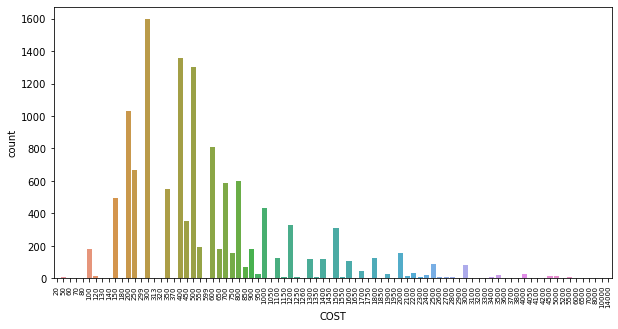

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='COST',data=train)
plt.xticks(fontsize = 7,rotation=90)
plt.show()

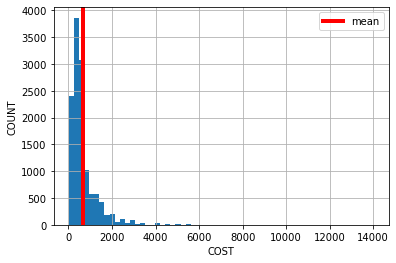

Mean Cost is:  655.2522458628841


In [56]:
# checking mean for cost
cost=train['COST'].hist(bins=60)
mean=np.mean(train['COST'])
plt.axvline(mean,linewidth=4,color='red',label='mean')
plt.xlabel('COST')
plt.ylabel('COUNT')
plt.legend()
plt.show()
print('Mean Cost is: ',train['COST'].mean())

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['CITY','LOCALITY','TITLE']
for val in list:
    train[val]=le.fit_transform(train[val].astype(str))

In [58]:
train


,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,3,321,285,3.6,49.0,1200
1,33,3,67,1047,4.2,30.0,1500
2,31,4,67,1102,3.8,221.0,800
3,95,2,222,136,4.1,24.0,800
4,50,1,222,620,3.8,165.0,300
...,...,...,...,...,...,...,...
12685,95,3,131,342,3.8,546.0,500
12686,33,2,222,133,4.3,1214.0,1800
12687,71,4,240,1343,4.0,608.0,1300
12688,31,4,67,631,3.5,32.0,400


In [59]:
#sns.lineplot(x=train["VOTES"],y=train["COST"],data=train)
#plt.show()

# EDA

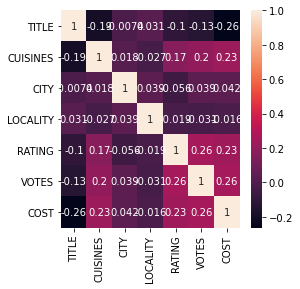

In [60]:
# heatmap correlation
import seaborn as sns
corr_hmap=train.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr_hmap,annot=True)
plt.show()

TITLE          AxesSubplot(0.125,0.772143;0.110714x0.107857)
CUISINES    AxesSubplot(0.257857,0.772143;0.110714x0.107857)
CITY        AxesSubplot(0.390714,0.772143;0.110714x0.107857)
LOCALITY    AxesSubplot(0.523571,0.772143;0.110714x0.107857)
RATING      AxesSubplot(0.656429,0.772143;0.110714x0.107857)
VOTES       AxesSubplot(0.789286,0.772143;0.110714x0.107857)
COST           AxesSubplot(0.125,0.642714;0.110714x0.107857)
dtype: object

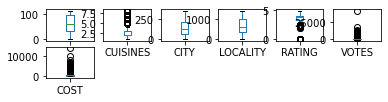

In [61]:
#checking Outliers
train.plot.box(subplots=True,layout=(6,6))

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  int32  
 1   CUISINES  12690 non-null  int64  
 2   CITY      12690 non-null  int32  
 3   LOCALITY  12690 non-null  int32  
 4   RATING    12690 non-null  float64
 5   VOTES     12690 non-null  float64
 6   COST      12690 non-null  int64  
dtypes: float64(2), int32(3), int64(2)
memory usage: 545.4 KB


In [63]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(train))
print(train.shape)
train=train.loc[(z<3).all(axis=1)]
print(train.shape)

(12690, 7)
(12107, 7)


In [64]:
train1=train.drop(columns=['COST'])
df_x=train1
y=train['COST']

In [65]:
df_x.skew()

TITLE      -0.091562
CUISINES    0.682558
CITY        0.252221
LOCALITY    0.329641
RATING     -2.171680
VOTES       2.586682
dtype: float64

In [66]:
# Treating the skewness
df_x.skew()
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.cbrt(df_x[col])

In [67]:
df_x.skew()

TITLE      -0.091562
CUISINES    0.214549
CITY        0.252221
LOCALITY    0.329641
RATING     -2.615753
VOTES       1.085109
dtype: float64

In [68]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)

# Splitting and Sending Data to Model

In [69]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 55 is 0.32182175520530176


In [70]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=53)

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')


Score of  LinearRegression()  is 0.2814910015949976
Error:
Mean Absolute Error: 248.9862412749512
Mean Squared Error: 139897.67037000274
Root Mean Squared Error: 374.0289699608878
R2 Score: 0.2819200694998165
**************************************************************************************************


Score of  Lasso()  is 0.2814584426217587
Error:
Mean Absolute Error: 249.08968256675135
Mean Squared Error: 139914.16701912478
Root Mean Squared Error: 374.05102194637135
R2 Score: 0.2818353939464373
**************************************************************************************************


Score of  Ridge()  is 0.281490999592655
Error:
Mean Absolute Error: 248.9863919474549
Mean Squared Error: 139897.91085155035
Root Mean Squared Error: 374.0292914352435
R2 Score: 0.2819188351334935
**************************************************************************************************


Score of  ElasticNet()  is 0.2611355123691115
Error:
Mean Absolute Error: 255.2263294098229

# Using Ensemble Technique

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print("R2 Score is: ",r2_score(y_test,predrfr))
print("RSME is: ",np.sqrt(mean_squared_error(y_test,predrfr)))
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
    

R2 Score is:  0.6817267418314831
RSME is:  249.01122330744911
Mean Absolute Error: 171.67281405698625
Mean Squared Error: 62006.58933307229


In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print("R2 Score is: ",r2_score(y_test,predgbr))
print("RSME is: ",np.sqrt(mean_squared_error(y_test,predgbr)))
print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr))
    

R2 Score is:  0.6699300699521362
RSME is:  253.5839879299652
Mean Absolute Error: 173.2099581936833
Mean Squared Error: 64304.83893446473


# Using GridsearchCV

In [74]:
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
estimator={'n_estimators':[50,100,150]}
clf=GridSearchCV(rfr,estimator)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 150}

# Selecting the best model

In [75]:
rfr=RandomForestRegressor(n_estimators=150)
rfr.fit(x_train,y_train)
print("Score is ",rfr.score(x_train,y_train))
pred=gbr.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

Score is  0.949614014404497


Mean Absolute Error: 173.2099581936833
Mean Squared Error: 64304.83893446473
Root Mean Squared Error: 253.5839879299652
R2 Score: 0.6699300699521362


# Cross Validation

In [76]:
# cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(rfr,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.67369519 0.64539959 0.64277287 0.64880884 0.68087771]
0.6583108394359076 0.015775668138941094


# Saving the Model

In [77]:
# saving the model

import joblib
joblib.dump(rfr,'Restaurant.pkl')

['Restaurant.pkl']

# Preprocessing Of Testing Data

In [78]:
test=pd.read_excel("Data_test.xlsx")
test


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [79]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [80]:
test["CITY"] = test["CITY"].fillna('NOTFOUND')
test["LOCALITY"] = test["LOCALITY"].fillna('NOTFOUND')
test["VOTES"] = test["VOTES"].fillna('0.0 Votes')


In [81]:
test["RATING"].replace("NEW",0,inplace=True)
test["RATING"].replace("-",0,inplace=True)
test["RATING"].fillna(0,inplace=True)

In [82]:
test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [83]:
test.drop('RESTAURANT_ID',axis=1,inplace=True)

In [84]:
test["VOTES"]=test["VOTES"].map(lambda x:x.split(' ')[0])

In [85]:
test.drop('TIME',axis=1,inplace=True)

In [86]:
def imput_cus(x):
    fnd=x.count(',')
    return int(fnd+1)

In [87]:
test['CUISINES']=test.apply(lambda x : imput_cus(x['CUISINES']),axis=1)

In [88]:
test

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4,Noida,Sector 18,4.3,564
1,QUICK BITES,4,Mumbai,Grant Road,4.2,61
2,CASUAL DINING,4,Mumbai,Marine Lines,3.8,350
3,None,1,Faridabad,NIT,3.8,1445
4,QUICK BITES,2,Kochi,Kaloor,3.6,23
...,...,...,...,...,...,...
4226,CASUAL DINING,3,New Delhi,Punjabi Bagh,3.9,287
4227,None,5,Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,2,Faridabad,Sector 86,3.7,53
4229,QUICK BITES,2,Kochi,Kochi,0,0.0


In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['CITY','LOCALITY','TITLE']
for val in list:
    test[val]=le.fit_transform(test[val].astype(str))

In [90]:
test

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,23,4,111,663,4.3,564
1,75,4,96,221,4.2,61
2,23,4,96,411,3.8,350
3,66,1,41,456,3.8,1445
4,75,2,78,300,3.6,23
...,...,...,...,...,...,...
4226,23,3,109,598,3.9,287
4227,66,5,9,237,4.3,469
4228,75,2,41,697,3.7,53
4229,75,2,78,332,0,0.0


# EDA

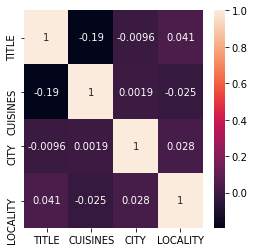

In [91]:
# heatmap correlation
import seaborn as sns
corr_hmap=test.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr_hmap,annot=True)
plt.show()

TITLE          AxesSubplot(0.125,0.772143;0.110714x0.107857)
CUISINES    AxesSubplot(0.257857,0.772143;0.110714x0.107857)
CITY        AxesSubplot(0.390714,0.772143;0.110714x0.107857)
LOCALITY    AxesSubplot(0.523571,0.772143;0.110714x0.107857)
dtype: object

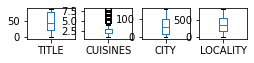

In [92]:
#checking Outliers
test.plot.box(subplots=True,layout=(6,6))

In [99]:
test['RATING']=test['RATING'].astype(float)
test['VOTES']=test['VOTES'].astype(float)

In [100]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(test))
print(test.shape)
test=test.loc[(z<3).all(axis=1)]
print(test.shape)

(4231, 6)
(4085, 6)


In [101]:
test.skew()

TITLE      -0.051937
CUISINES    0.651316
CITY        0.068269
LOCALITY    0.295391
RATING     -2.159778
VOTES       2.520112
dtype: float64

In [102]:
test.skew()
for col in test.skew().index:
    if col in test.describe().columns:
        if test[col].skew()>0.55:
            test[col]=np.sqrt(test[col])
        if test[col].skew()<-0.55:
            test[col]=np.cbrt(test[col])

In [103]:
test.skew()

TITLE      -0.051937
CUISINES    0.194415
CITY        0.068269
LOCALITY    0.295391
RATING     -2.629981
VOTES       1.022456
dtype: float64

# Putting Test Data in Model

In [104]:
#Now we put test data in our model
rfr.predict(test)

array([523.        , 523.        , 523.        , ..., 493.33333333,
       432.33333333, 489.66666667])